**READ DATASET**

In [16]:
import pandas as pd
dataSepsis = pd.read_csv("/content/Dataset.csv", sep=",")

In [17]:
dataSepsis.head(5)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [18]:
dataSepsis.shape

(1552210, 44)

In [19]:
dataSepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

**CLEAN DATASET**

In [20]:
import numpy as np 
from matplotlib import pyplot as plt

In [21]:
# Check for any null values

dataSepsis.isnull().sum()

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

In [22]:
dataSepsis.nunique()


Unnamed: 0            336
Hour                  336
HR                    343
O2Sat                 145
Temp                  641
SBP                   990
MAP                   945
DBP                   678
Resp                  235
EtCO2                 139
BaseExcess            407
HCO3                  304
FiO2                  104
pH                    103
PaCO2                 551
SaO2                  432
AST                  2025
BUN                   265
Alkalinephos          752
Calcium               549
Chloride              108
Creatinine           1407
Bilirubin_direct      280
Glucose              1157
Lactate              1340
Magnesium             110
Phosphate             193
Potassium             402
Bilirubin_total       407
TroponinI            2423
Hct                   725
Hgb                   340
PTT                  1410
WBC                   891
Fibrinogen            823
Platelets             989
Age                  5987
Gender                  2
Unit1       

In [23]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(dataSepsis['Patient_ID'].unique())
len(patients)

40336

In [24]:
dataSepsis['Unit'] = dataSepsis['Unit1'].add(dataSepsis['Unit2'], fill_value=0)
dataSepsis.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NaN


<Axes: >

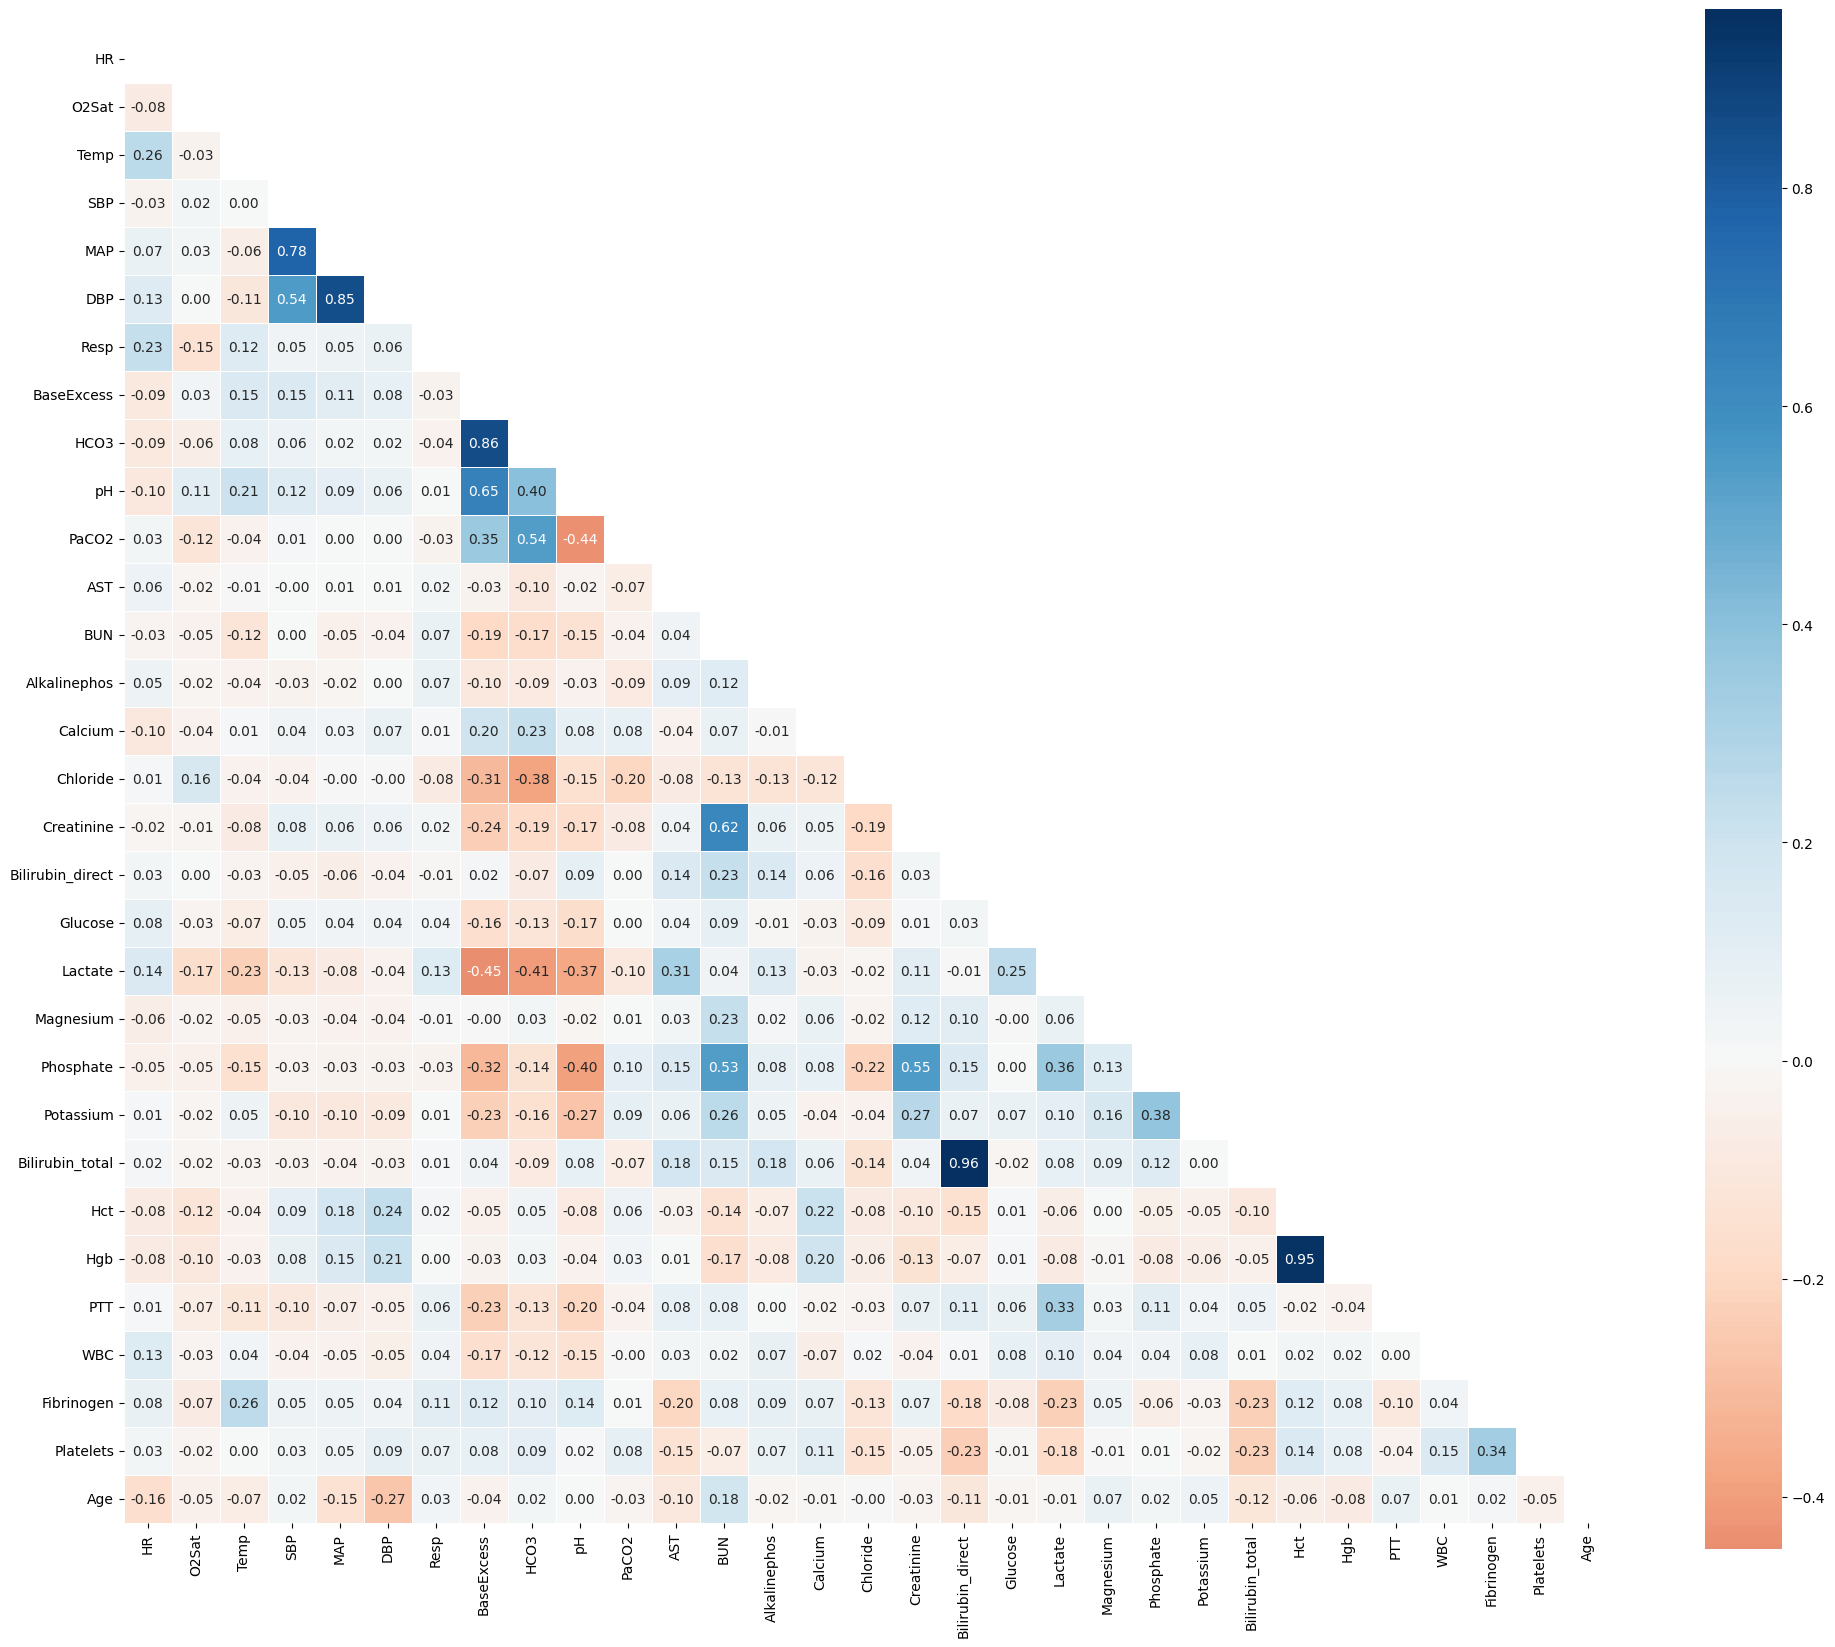

In [25]:
import seaborn as sns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = dataSepsis[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,20))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [26]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium', 
'Phosphate','Potassium','PTT','Fibrinogen','Bilirubin_direct','Hct','Unit1','Unit2'}
dataSepsis.drop(columns=columns_drop, inplace=True)
dataSepsis.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [27]:
dataSepsis.fillna(0, inplace=True)
dataSepsis.head(100)

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,1,0,17072,0.0
1,1,65.0,100.0,0.0,72.00,16.5,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,2,0,17072,0.0
2,2,78.0,100.0,0.0,42.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,3,0,17072,0.0
3,3,73.0,100.0,0.0,0.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,4,0,17072,0.0
4,4,70.0,100.0,0.0,74.00,14.0,0.4,0.0,0.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,1,0,9891,1.0
96,1,119.0,98.0,0.0,87.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,2,0,9891,1.0
97,2,120.0,97.0,0.0,95.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,3,0,9891,1.0
98,3,116.0,97.0,36.0,84.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,4,0,9891,1.0


In [28]:
# Identified duplicates in the dataset

duplicated = dataSepsis[dataSepsis.duplicated(keep=False)]
duplicated.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit


CHECK OUTLIERS

In [29]:
# Determining Heart rate in the range of 10 and 200
target_dataSepsis = dataSepsis [(dataSepsis['HR'] >= 200) & (dataSepsis['HR'] <= 10 )]
target_dataSepsis.shape

(0, 26)

In [30]:
# Determining Temperature in the range of 20 and 40
target_dataSepsis = dataSepsis [(dataSepsis['Temp'] >= 40) & (dataSepsis['Temp'] <= 20 )]
target_dataSepsis.shape

(0, 26)

In [31]:

# Group the data by patient ID and calculate mean, min, max, and std for each column
grouped_data = dataSepsis.groupby(['Patient_ID']).agg({'Hour': 'mean', 'HR': ['mean', 'min', 'max', 'std'], 'O2Sat': ['mean', 'min', 'max', 'std'], 
                                               'Temp': ['mean', 'min', 'max', 'std'], 'MAP': ['mean', 'min', 'max', 'std'], 'Resp': ['mean', 'min', 'max', 'std'],
                                               'FiO2': ['mean', 'min', 'max', 'std'], 'SaO2': ['mean', 'min', 'max', 'std'], 'AST': ['mean', 'min', 'max', 'std'],
                                               'BUN': ['mean', 'min', 'max', 'std'], 'Creatinine': ['mean', 'min', 'max', 'std'], 'Glucose': ['mean', 'min', 'max', 'std'],
                                               'Hgb': ['mean', 'min', 'max', 'std'], 'WBC': ['mean', 'min', 'max', 'std'], 'Platelets': ['mean', 'min', 'max', 'std'],
                                               'Age': 'mean', 'Gender': 'first', 'HospAdmTime': 'first', 'ICULOS': 'max', 'SepsisLabel': 'max', 'Unit': 'first'})

# Flatten the column names of the resulting DataFrame
grouped_data.columns = ["_".join(x) for x in grouped_data.columns.ravel()]
# Add patient_ID to the data frame
grouped_data = grouped_data.reset_index()
# Write the aggregated data to a new CSV file
grouped_data.to_csv('C:\\Users\\Azmat\\OneDrive\\Desktop\\big data\\aggregated_data.csv', index=False)

<ipython-input-31-a23b072c40f7>:10: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_data.columns = ["_".join(x) for x in grouped_data.columns.ravel()]


CHECK FOR DATA IMBALANCE

In [32]:
data = pd.read_csv("/content/C:\\Users\\Azmat\\OneDrive\\Desktop\\big data\\aggregated_data.csv", sep=",")
# Count the number of instances for each target class
Gender_counts = data['Gender_first'].value_counts()
Sepsis_counts = data['SepsisLabel_max'].value_counts()
# Calculate the percentage of each target class
Gender_percentages = Gender_counts / len(data) * 100
Sepsis_percentages = Sepsis_counts / len(data) * 100

# Print the class percentages
print(Gender_percentages)
print(Sepsis_percentages)

1    55.945061
0    44.054939
Name: Gender_first, dtype: float64
0    92.731059
1     7.268941
Name: SepsisLabel_max, dtype: float64


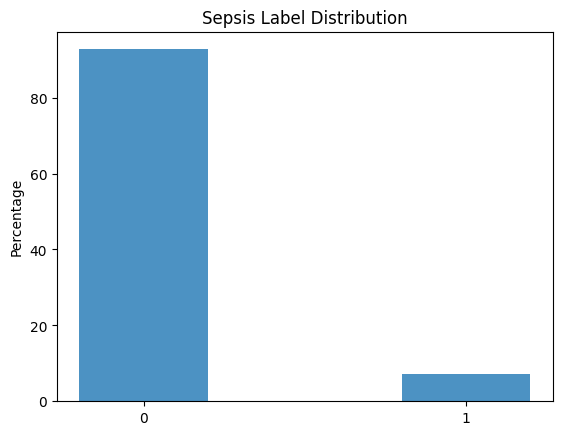

In [33]:
# Create a bar chart
fig, ax = plt.subplots()
ax.bar(Sepsis_percentages.index, Sepsis_percentages.values, tick_label=Sepsis_percentages.index, width=0.4, align='center', alpha=0.8)
ax.set_ylabel('Percentage')
ax.set_title('Sepsis Label Distribution')

# Show the plot
plt.show()

In [34]:
print (dataSepsis.columns)

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Glucose', 'Lactate',
       'Bilirubin_total', 'TroponinI', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID', 'Unit'],
      dtype='object')


***UNDER SAMPLING***

In [35]:
data = pd.read_csv("/content/C:\\Users\\Azmat\\OneDrive\\Desktop\\big data\\aggregated_data.csv", sep=",")
majority_class = data[data['SepsisLabel_max'] == 0]
minority_class = data[data['SepsisLabel_max'] == 1]
print('number of sepsis label 1 is {}'.format(len(minority_class)))
print('while number of sepsis label 0 is {}'.format(len(majority_class)))

number of sepsis label 1 is 2932
while number of sepsis label 0 is 37404


In [36]:
# Undersampling

majority_class_subset = majority_class.sample(n=2*len(minority_class))
data = pd.concat([majority_class_subset, minority_class])

In [37]:
Sepsis_counts = data['SepsisLabel_max'].value_counts()
Sepsis_percentages = Sepsis_counts / len(data) * 100
print(Sepsis_percentages)

0    66.666667
1    33.333333
Name: SepsisLabel_max, dtype: float64


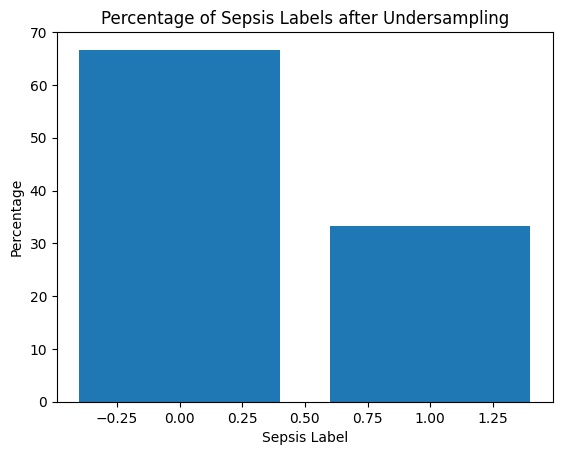

In [38]:
plt.bar(Sepsis_counts.index, Sepsis_percentages)
plt.title("Percentage of Sepsis Labels after Undersampling")
plt.xlabel("Sepsis Label")
plt.ylabel("Percentage")
plt.show()

***LOGISTIC REGRESSION***

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Separate features and target variables
X = data.drop('SepsisLabel_max', axis=1)
y = data['SepsisLabel_max']

# Split data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Define the logistic regression model
clf = LogisticRegression(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search using 5-fold cross-validation on the training set
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training set with the best hyperparameters
clf_best = LogisticRegression(C=grid_search.best_params_['C'], random_state=42)
clf_best.fit(X_train, y_train)

# Evaluate the model performance on the validation set
y_pred_val = clf_best.predict(X_val)
LR_acc_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', LR_acc_val)
print(classification_report(y_val, y_pred_val))

# Evaluate the model performance on the testing set
y_pred_test = clf_best.predict(X_test)
LR_acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing set:', LR_acc_test)
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'C': 0.01}
Best score: 0.7356345177664975
Accuracy on validation set: 0.7086038961038961
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       782
           1       0.70      0.35      0.47       450

    accuracy                           0.71      1232
   macro avg       0.71      0.63      0.63      1232
weighted avg       0.71      0.71      0.68      1232

Accuracy on testing set: 0.7366426676771505
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1759
           1       0.69      0.38      0.49       880

    accuracy                           0.74      2639
   macro avg       0.72      0.65      0.66      2639
weighted avg       0.73      0.74      0.71      2639



***NAIVE BAYES***

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes classifier
clf = GaussianNB()

# Define the hyperparameter grid to search over
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8]}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Train the model on the training data with the best hyperparameters
clf_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
clf_best.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = clf_best.predict(X_val)

# Evaluate the model performance on the validation set
NB_acc_val = accuracy_score(y_val, y_pred_val)

# Make predictions on the testing data
y_pred_test = clf_best.predict(X_test)

# Evaluate the model performance on the testing set
NB_acc_test = accuracy_score(y_test, y_pred_test)

# Print the validation and testing accuracy and classification report
print('Validation Accuracy:',NB_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', NB_acc_test)
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'var_smoothing': 1e-10}
Best score: 0.7650761421319796
Validation Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       782
           1       0.75      0.49      0.59       450

    accuracy                           0.75      1232
   macro avg       0.75      0.70      0.71      1232
weighted avg       0.75      0.75      0.74      1232

Testing Accuracy: 0.7635467980295566
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1759
           1       0.75      0.43      0.55       880

    accuracy                           0.76      2639
   macro avg       0.76      0.68      0.69      2639
weighted avg       0.76      0.76      0.74      2639



***SUPPORT VECTOR MACHINE***

In [44]:

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
clf = SVC(kernel='rbf',C=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Make predictions on the validation set
y_pred_val = clf.predict(X_val)
# Evaluate the model performance on the validation set
SVM_acc_val = accuracy_score(y_val, y_pred_val)
# Make predictions on the testing data
y_pred_test = clf.predict(X_test)
# Evaluate the model performance on the testing set
SVM_acc_test = accuracy_score(y_test, y_pred_test)
print('Validation Accuracy:', SVM_acc_val)
print(classification_report(y_val, y_pred_val))

print('Testing Accuracy:', SVM_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.6339285714285714
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       782
           1       0.00      0.00      0.00       450

    accuracy                           0.63      1232
   macro avg       0.32      0.50      0.39      1232
weighted avg       0.40      0.63      0.49      1232

Testing Accuracy: 0.6657824933687002
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1759
           1       0.00      0.00      0.00       880

    accuracy                           0.67      2639
   macro avg       0.33      0.50      0.40      2639
weighted avg       0.44      0.67      0.53      2639



***RANDOM FOREST***

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Train a Random Forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rfc.predict(X_val)

# Evaluate the model performance on the validation set
RF_acc_val = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy:', RF_acc_val)
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rfc.predict(X_test)

# Evaluate the model performance on the testing set
RF_acc_test = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy:', RF_acc_test)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.8587662337662337
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       782
           1       0.92      0.67      0.78       450

    accuracy                           0.86      1232
   macro avg       0.88      0.82      0.84      1232
weighted avg       0.87      0.86      0.85      1232

Testing Accuracy: 0.8609321712769988
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1759
           1       0.89      0.66      0.76       880

    accuracy                           0.86      2639
   macro avg       0.87      0.81      0.83      2639
weighted avg       0.86      0.86      0.85      2639



***COMPARISON OF ACCURACY***

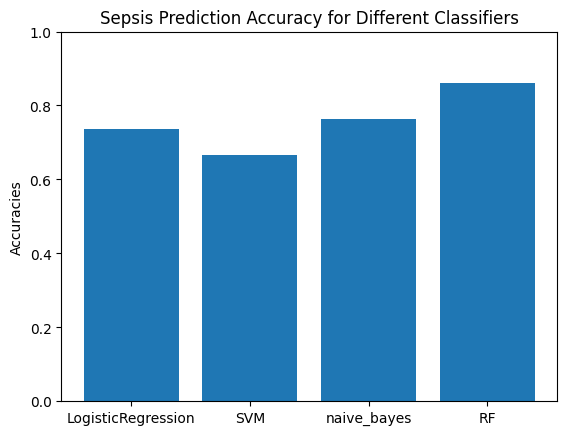

In [46]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_test, SVM_acc_test, NB_acc_test, RF_acc_test]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Accuracy for Different Classifiers')
plt.show()

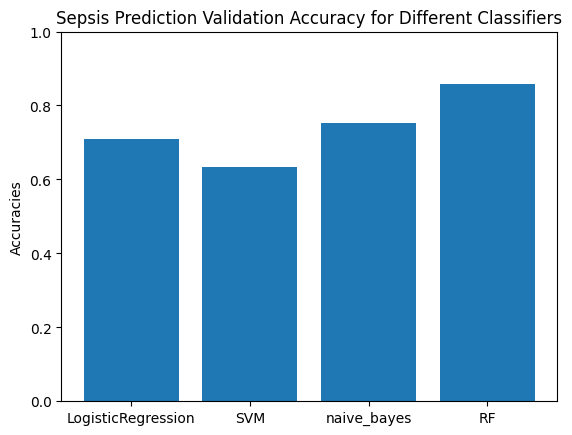

In [47]:
classifiers = ['LogisticRegression', 'SVM', 'naive_bayes','RF']
accuracies = [LR_acc_val, SVM_acc_val, NB_acc_val, RF_acc_val]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Sepsis Prediction Validation Accuracy for Different Classifiers')
plt.show()